In [1]:
%load_ext autoreload

In [2]:
import xarray as xra
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from source2 import *
#from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, mean_squared_error,multilabel_confusion_matrix

In [3]:
#loading the data
path0 = "../FXD20210719/"
variables = VAREXTRACT(path0)
variables.extract()
cnr_17 = variables.cnr_day
time_17 = pd.to_datetime(variables.time_day, unit = 's', utc = True)
pbl_17 = variables.atm_structures
windsp_17 = variables.ver_wind_speed
relat_beta = variables.relat_beta_day
spectral_width = variables.spectral_width_day
atm_struct = variables.atm_structures
 

In [4]:
"""
flag_masks = "0,20,30,200,300,400,2000,3000,4000"
:flag_meanings = "No data or no detection, residual layer, mixed layer , unclassified cloud, ice cloud,
                water cloud, unclassified aerosol , spherical aerosol, aspherical aerosol";

"""

'\nflag_masks = "0,20,30,200,300,400,2000,3000,4000"\n:flag_meanings = "No data or no detection, residual layer, mixed layer , unclassified cloud, ice cloud,\n                water cloud, unclassified aerosol , spherical aerosol, aspherical aerosol";\n\n'

In [5]:
# turn data into dataframes
%autoreload
df_cnr = dataframe_set(cnr_17,time_17)
df_pbl = dataframe_set(pbl_17,time_17)
df_windsp = dataframe_set(windsp_17,time_17)
df_struct = dataframe_set(atm_struct,time_17)
df_beta = dataframe_set(relat_beta,time_17)
df_specw = dataframe_set(spectral_width, time_17)

## Spectral width
spectral width is an indication of amount of turbulence. 

Transition from high to low turbulence may indicate top of mixing layers?

See here that spectral width becomes very noisy above a certain height.

No handles with labels found to put in legend.


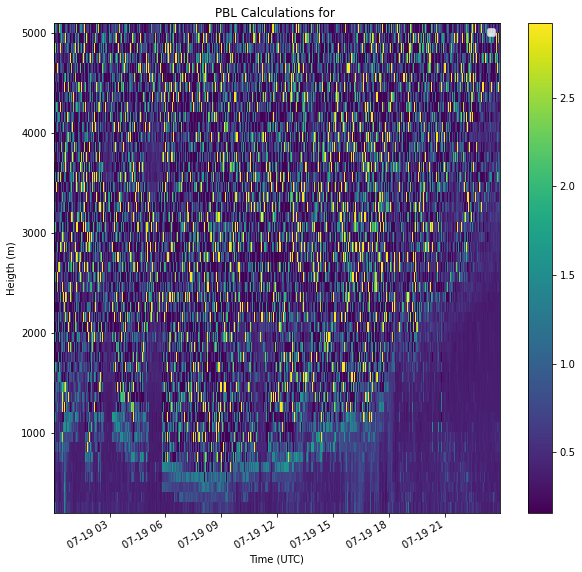

In [6]:
%autoreload
plot_all(df_specw,cbarlbl='', cmap='viridis', plot_type='pcolormesh')

No handles with labels found to put in legend.


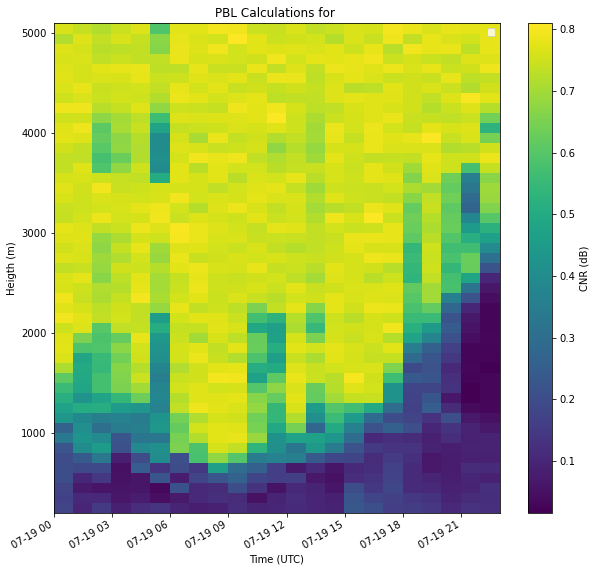

In [290]:
plot_all(df_specw.resample('1H').std(),plot_type='pcolormesh', cmap='viridis')

## Relative Beta
relative beta related to CNR - looks very like CNR on log scale.

No handles with labels found to put in legend.


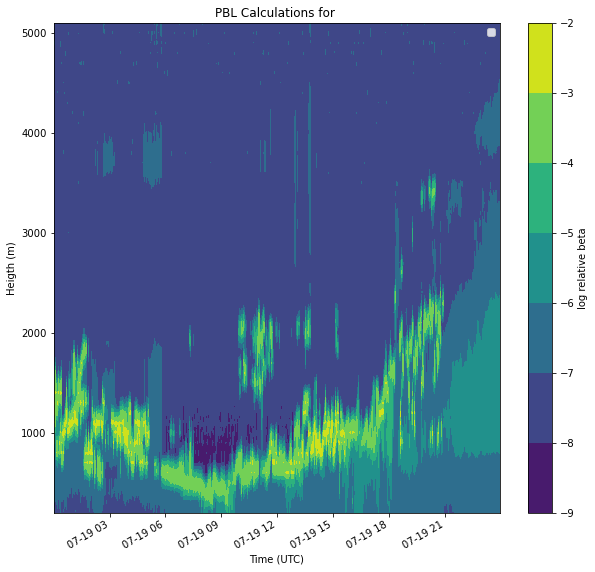

In [292]:
# Relative beta on log scale.
# looks almost exactly same as CNR.
%autoreload
plot_all(np.log10(df_beta), cbarlbl='log relative beta',cmap='viridis',plot_type='contourf')

In [266]:
logbeta = np.log10(df_beta)

In [9]:
logbetavar = logbeta.resample('1H').std()
plot_all(logbetavar,plot_type='pcolormesh')

NameError: name 'logbeta' is not defined

In [268]:
betavar = df_beta.resample('1H').std()

No handles with labels found to put in legend.


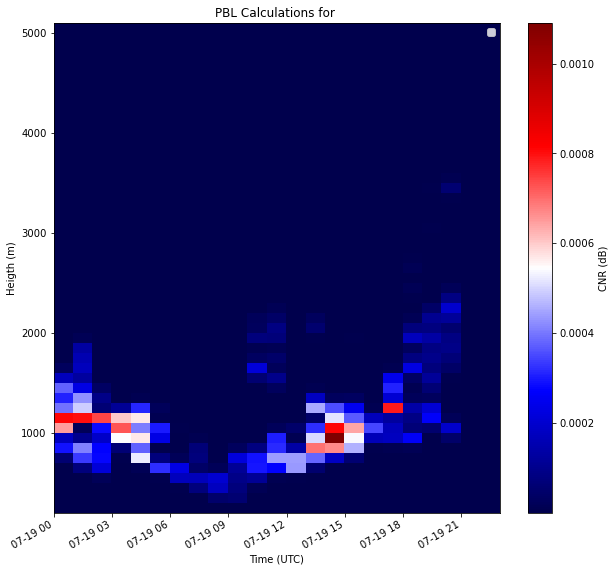

In [269]:
plot_all(betavar,plot_type='pcolormesh')
plt.show()
#plot_all(betavar,plot_type='pcolormesh')

No handles with labels found to put in legend.


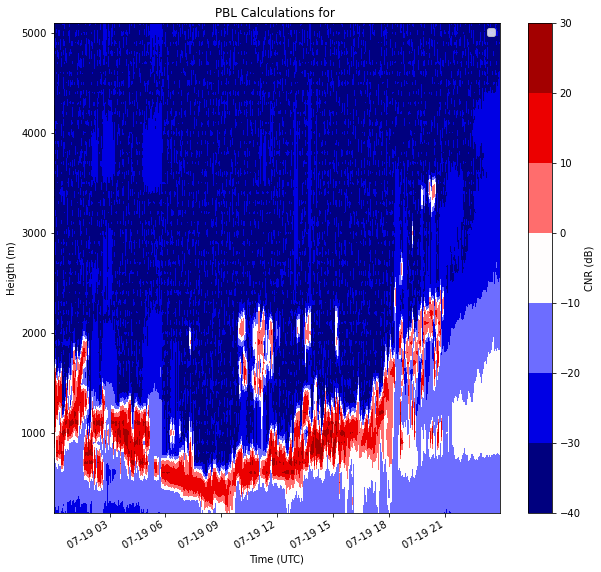

In [16]:
%autoreload
plot_all(df_cnr)

No handles with labels found to put in legend.


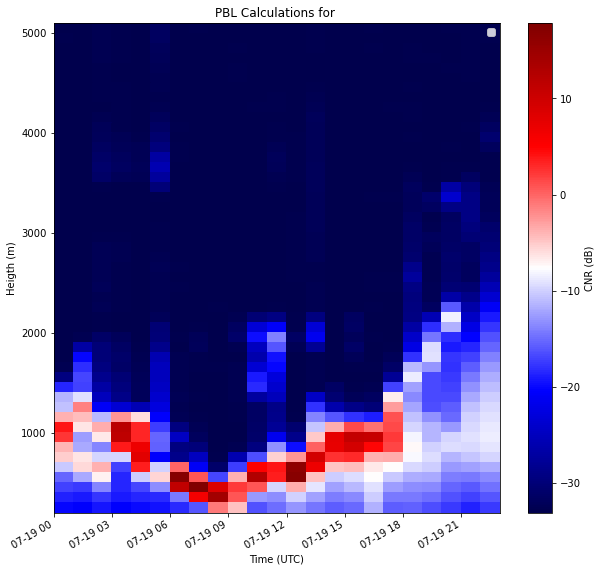

In [17]:
df2 = pbl_height_sub(df_cnr,stat='mean')
plot_all(df2,plot_type='pcolormesh')

No handles with labels found to put in legend.


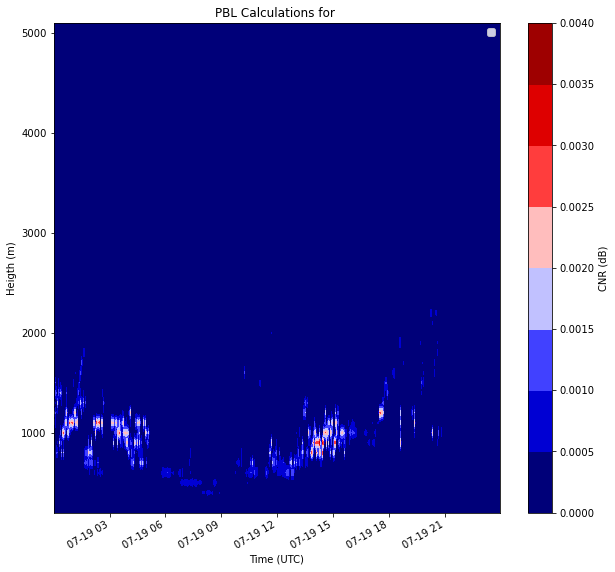

In [246]:
%autoreload
plot_all(df_beta)
plt.show()

## Wind Speed

In [36]:
wvar = df_windsp.resample('30M').var()

In [38]:
wvar

,5100,5000,4900,4800,4700,4600,4500,4400,4300,4200,...,1100,1000,900,800,700,600,500,400,300,200
2021-07-31 00:00:00+00:00,290.765185,287.670786,290.933305,293.171777,297.543845,298.179092,296.415593,297.585331,283.604778,279.393249,...,90.415826,73.821445,61.573492,41.066547,24.532984,4.084096,0.195331,0.196903,0.27174,0.370287


In [34]:
%autoreload
test = pbl_height(wvar,var_type='wind')

Series([], Name: 2021-07-31 00:00:00+00:00, dtype: float64)


UnboundLocalError: local variable 'maxindex' referenced before assignment

In [26]:
test

(DatetimeIndex(['2021-07-19 00:00:00+00:00', '2021-07-19 01:00:00+00:00',
                '2021-07-19 02:00:00+00:00', '2021-07-19 03:00:00+00:00',
                '2021-07-19 04:00:00+00:00', '2021-07-19 05:00:00+00:00',
                '2021-07-19 06:00:00+00:00', '2021-07-19 07:00:00+00:00',
                '2021-07-19 08:00:00+00:00', '2021-07-19 09:00:00+00:00',
                '2021-07-19 10:00:00+00:00', '2021-07-19 11:00:00+00:00',
                '2021-07-19 12:00:00+00:00', '2021-07-19 13:00:00+00:00',
                '2021-07-19 14:00:00+00:00', '2021-07-19 15:00:00+00:00',
                '2021-07-19 16:00:00+00:00', '2021-07-19 17:00:00+00:00',
                '2021-07-19 18:00:00+00:00', '2021-07-19 19:00:00+00:00',
                '2021-07-19 20:00:00+00:00', '2021-07-19 21:00:00+00:00',
                '2021-07-19 22:00:00+00:00', '2021-07-19 23:00:00+00:00'],
               dtype='datetime64[ns, UTC]', freq=None),
 [200,
  200,
  200,
  200,
  200,
  200,
  200,
  200,

No handles with labels found to put in legend.


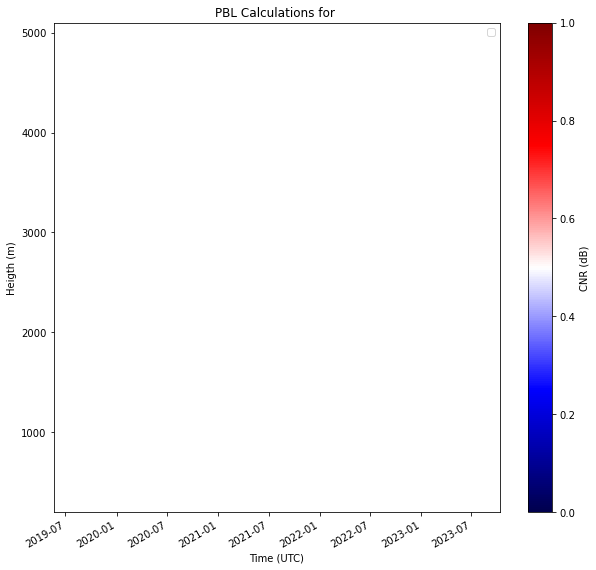

In [37]:
plot_all(wvar,plot_type='pcolormesh')
ax = plt.gca()
#ax.plot(test)

No handles with labels found to put in legend.


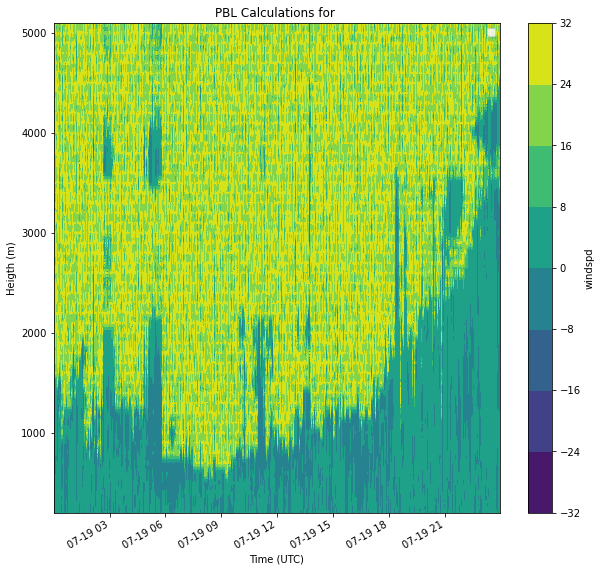

In [296]:
plot_all(df_windsp,cbarlbl='windspd',cmap='viridis')

%autoreload
plt.show()
plot_all(np.log10(wvar),cbarlbl='windspd',cmap='viridis',plot_type='pcolormesh')

## atmospheric structures

No handles with labels found to put in legend.


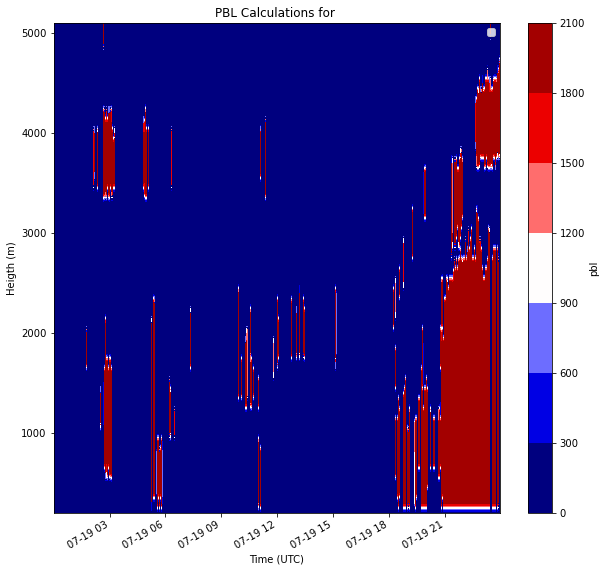

In [297]:
%autoreload
#plot_all(df_cnr)
#plt.show()
plot_all(df_pbl,cbarlbl='pbl')
plt.show()
#plot_all(df_windsp,cbarlbl='windspd')

In [90]:
#creating dataframe
# 20 - is residual layer
# 30 - mixed layer
# 0 - no data
# 200 - unclassified cloud
# 300 - ice
# 400 - cloud
# 2000 - unclassified aersol

# relative beta calculated from CNR values. attenuated relative backscatter coefficient.

#data ={"CNR":cnr_17, "Vertical_wind":windsp_17, "Relative_beta": relat_beta, "spectral_width":spectral_width,
#       "Lidar_flags":atm_struct}

data ={"CNR":cnr_17, "Vertical_wind":windsp_17, "Relative_beta": relat_beta, "spectral_width":spectral_width,
       "Height":}
df = pd.DataFrame(data)
df.head()

SyntaxError: invalid syntax (<ipython-input-90-35f398e27fba>, line 16)

In [17]:
df['Lidar_flags'].unique()


array([  20.,  220.,  200.,    0.,   30.,  230., 2000., 2020., 2030.])

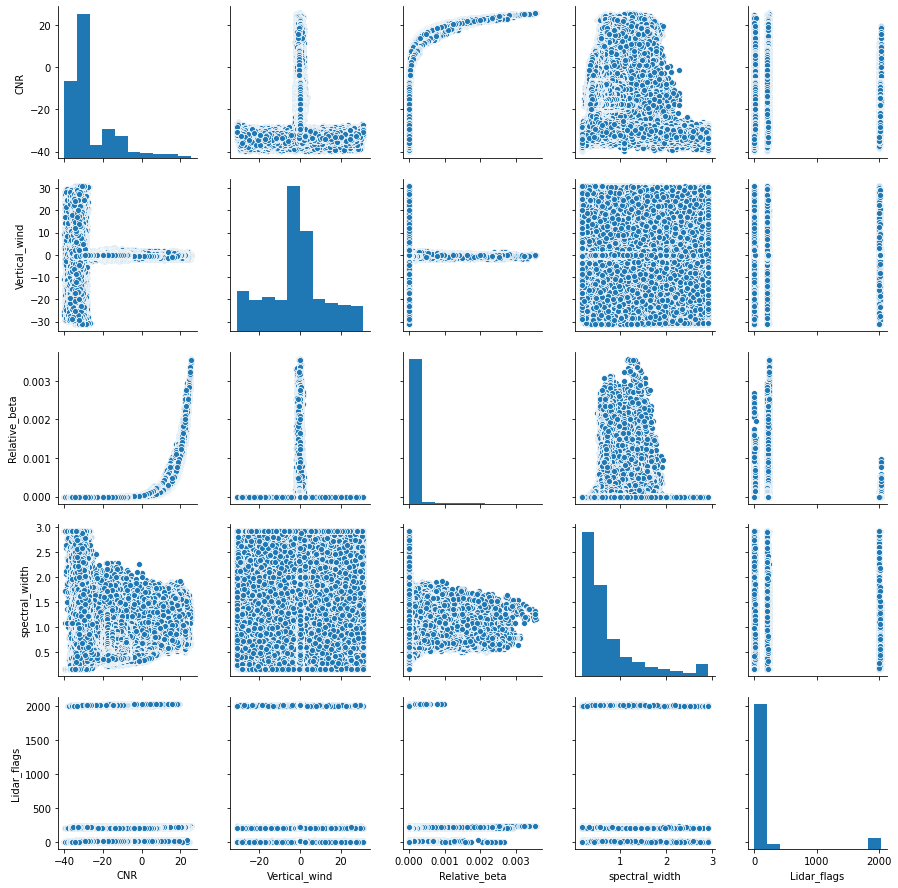

In [7]:
#peaking at the correlations, if any, of the whole dataset
sns.pairplot(df)

In [18]:
#selecting only the mixing height and the residual layer
df2 = df[(df.Lidar_flags<=30) & (df.Lidar_flags != 0) ]
df2.head()

,CNR,Vertical_wind,Relative_beta,spectral_width,Lidar_flags
0,-20.24,-0.45,8.600000e-08,0.68,20.0
1,-19.07,0.27,1.050000e-07,0.48,20.0
2,-17.73,0.98,1.380000e-07,0.44,20.0
3,-16.59,0.46,1.780000e-07,0.68,20.0
4,-14.56,0.08,2.890000e-07,0.38,20.0


In [19]:
#checking the correlation out
df2.corr()["Lidar_flags"]

CNR               0.134343
Vertical_wind    -0.003578
Relative_beta    -0.018185
spectral_width    0.133006
Lidar_flags       1.000000
Name: Lidar_flags, dtype: float64

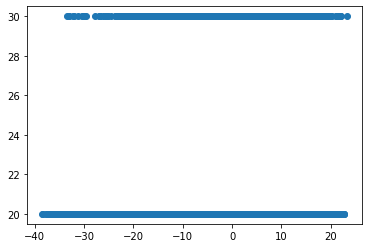

In [20]:
#since the flag values seem to be more correlated to the CNR I'm verifying the relationship
plt.scatter(df2["CNR"], df2["Lidar_flags"])
plt.show()

In [21]:
df.dtypes

CNR               float64
Vertical_wind     float64
Relative_beta     float64
spectral_width    float64
Lidar_flags       float64
dtype: object

In [22]:
df_residual = df[df.Lidar_flags == 20]
df_mixedL = df[df.Lidar_flags == 30]
df_uncloud = df[df.Lidar_flags == 200]
df_waterClo = df[df.Lidar_flags == 300]

In [23]:
%matplotlib inline

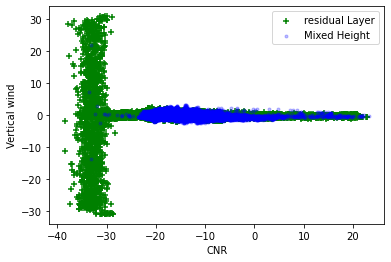

In [24]:
#plotting the scatter plots of each variable

plt.xlabel("CNR")
plt.ylabel("Vertical wind")
plt.scatter(df_residual["CNR"], df_residual["Vertical_wind"], color = "green", marker = "+", label= "residual Layer")
plt.scatter(df_mixedL["CNR"], df_mixedL["Vertical_wind"], color = "blue", marker = ".", alpha = 0.25, label = "Mixed Height")
#plt.scatter(df_uncloud["CNR"], df_uncloud["Vertical_wind"], color = "red", marker = "*", alpha = 0.1, label ="Unclassified Cloud")
#plt.scatter(df_waterClo["CNR"], df_waterClo["Vertical_wind"], color = "pink", marker = "^")
plt.legend()
plt.show()

In [33]:

#setting the atmospheric structures as teh target variable for now and 2 columns as variables
X = df2[df.columns[:-1].values]
y = df2["Lidar_flags"]

# normalizes the values
sc = StandardScaler()
sc.fit(X)

#splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

#standarizing the data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [34]:
#attempting Logistic linear regression

from sklearn.linear_model import LogisticRegression


In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)

LogisticRegression()

In [36]:
#making the predictions
y_pred = log_reg.predict(X_test_std)


In [37]:
#how good is it doing?

def confusion_plot():
    cf_matrix = confusion_matrix(y_test, y_pred)

    ax = sns.heatmap(cf_matrix, annot=True, fmt = 'd', cmap='Blues')

    ax.set_title('Confusion Matrix for Logistic Regression classifier\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Residual layer (20)','Mixing H (30)'])
    ax.yaxis.set_ticklabels(['Residual layer (20)','Mixing H (30)'])

## Display the visualization of the Confusion Matrix.
    plt.show()

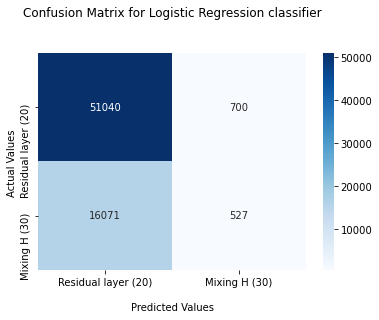

              precision    recall  f1-score   support

        20.0       0.99      0.76      0.86     67111
        30.0       0.03      0.43      0.06      1227

    accuracy                           0.75     68338
   macro avg       0.51      0.60      0.46     68338
weighted avg       0.97      0.75      0.84     68338



In [38]:
confusion_plot()
print(classification_report(y_pred,y_test))

In [39]:
len(df2)

207082

In [40]:
#accuracy is about 83%. The mixing height is not doing well. This might be due to data imbalance
#i'll used SMOTE to resample evenly
from imblearn.over_sampling import SMOTE


ModuleNotFoundError: No module named 'imblearn'

In [67]:
X_resampled, y_resampled = SMOTE().fit_resample(X,y)

<AxesSubplot:>

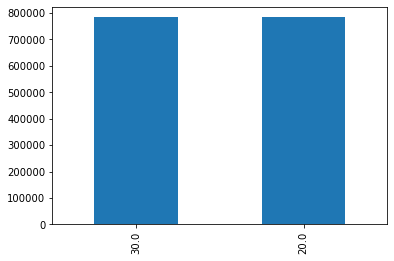

In [69]:
pd.Series(y_resampled).value_counts().plot(kind = 'bar')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

#standarizing the data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_std, y_train)
y_pred = log_reg.predict(X_test_std)


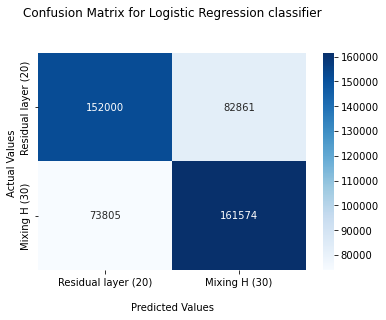

              precision    recall  f1-score   support

        20.0       0.65      0.67      0.66    225805
        30.0       0.69      0.66      0.67    244435

    accuracy                           0.67    470240
   macro avg       0.67      0.67      0.67    470240
weighted avg       0.67      0.67      0.67    470240



In [72]:
confusion_plot()
print(classification_report(y_pred,y_test))

In [ ]:
#The data is going ok at just %67 with the balanced data

In [ ]:
a = np.array([[2,2,2],[3,3,3]])